<a href="https://colab.research.google.com/github/piland/ITSC3156/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ethan Piland

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/animal-faces")

print("Path to dataset files:", path)

100%|██████████| 696M/696M [00:04<00:00, 152MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

train_dir = os.path.join(path, 'afhq', 'train')
validation_dir = os.path.join(path, 'afhq', 'val')

# Prepare data generators
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


Classes: ['wild', 'cat', 'dog']
Class Distribution: {'wild': 4738, 'cat': 5153, 'dog': 4739}


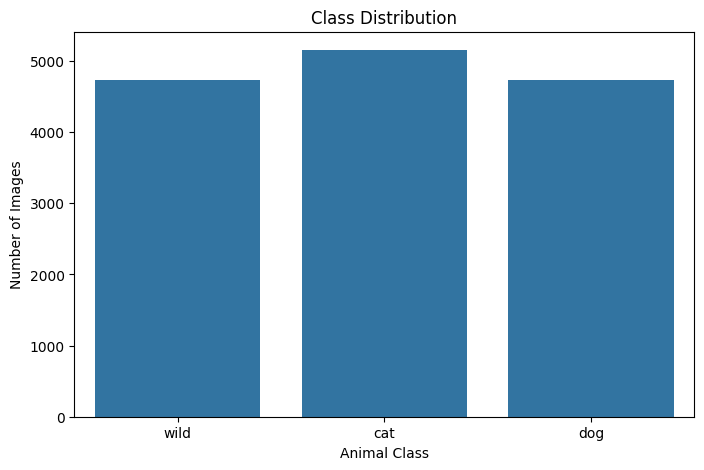

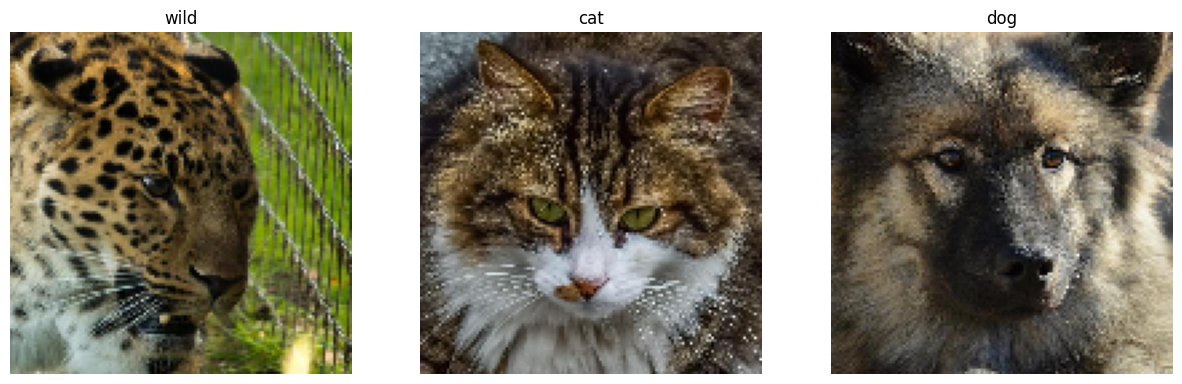

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import seaborn as sns

classes = os.listdir(train_dir)

print("Classes:", classes)
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}
print("Class Distribution:", class_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.show()

fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, cls in enumerate(classes):
    img_path = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0])
    img = load_img(img_path, target_size=(128, 128))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(cls)
plt.show()


CNN Implementation

In [ ]:
from tensorflow.keras import layers, models

# Define CNN
# https://www.tensorflow.org/guide/keras/sequential_model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.4945 - loss: 1.0007 - val_accuracy: 0.8093 - val_loss: 0.4628
Epoch 2/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 645s 1s/step - accuracy: 0.7881 - loss: 0.5155 - val_accuracy: 0.8947 - val_loss: 0.2993
Epoch 3/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 591s 1s/step - accuracy: 0.8571 - loss: 0.3687 - val_accuracy: 0.9307 - val_loss: 0.1866
Epoch 4/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.8932 - loss: 0.2802 - val_accuracy: 0.9347 - val_loss: 0.2002
Epoch 5/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step - accuracy: 0.9067 - loss: 0.2459 - val_accuracy: 0.9380 - val_loss: 0.1589
Epoch 6/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 586s 1s/step - accuracy: 0.9255 - loss: 0.2035 - val_accuracy: 0.9513 - val_loss: 0.1296
Epoch 7/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.9375 - loss: 0.1758 - val_accuracy: 0.9653 - val_loss: 0.0993
Epoch 8/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.9345 - loss: 0.1696 - val_accuracy: 0.962

Random Forest Implementation

In [ ]:
from tensorflow.keras.applications import VGG16
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load pre-trained VGG16 without top layer
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

def extract_features(generator, model):
    features = []
    labels = []
    for inputs_batch, labels_batch in generator:
        features_batch = model.predict(inputs_batch)
        features.append(features_batch)
        labels.append(labels_batch)
        if len(features) >= generator.samples // generator.batch_size:
            break
    return np.vstack(features), np.vstack(labels)

train_features, train_labels = extract_features(train_generator, vgg16)
val_features, val_labels = extract_features(validation_generator, vgg16)

train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, np.argmax(train_labels, axis=1))

val_predictions = rf_model.predict(val_features)
print("Random Forest Accuracy:", accuracy_score(np.argmax(val_labels, axis=1), val_predictions))
print("Classification Report:\n", classification_report(np.argmax(val_labels, axis=1), val_predictions))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━

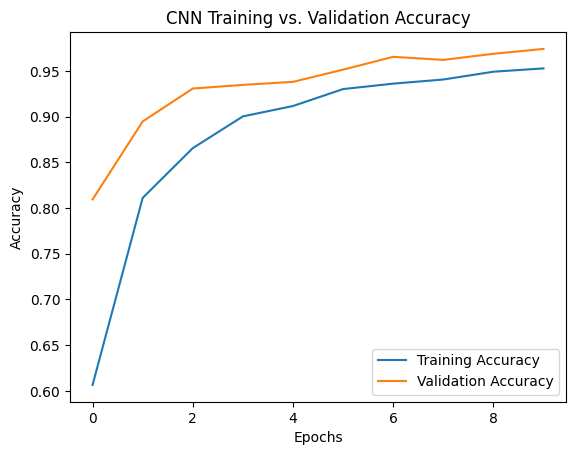

In [ ]:
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
